In [1]:
from matminer.datasets import get_available_datasets, load_dataset
import numpy as np
import pandas as pd

In [122]:
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.cm as cm
from catboost import CatBoostRegressor
import seaborn as sns
from sklearn.svm import SVR

from matminer.featurizers.conversions import StrToComposition

In [3]:
def plot_diff(ytrain, ytest):
    plt.figure(figsize=(8,6))
    plt.xlabel(u'$Tensile\ Strength_{exp}$')
    plt.ylabel(u'$Tensile\ Strength_{pred}$')
    c = cm.tab10(0)
    plt.scatter(ytrain, ytest, facecolors='none', edgecolors=c, s = [200]*len(ytest), linewidths=3)
    #plt.scatter(ytrain, ytest, colors=c, s = [100]*len(ytest), linewidths=3)
    plt.plot(ytrain, ytrain, '--k')
    plt.grid()
    plt.show()
    rmse = np.sqrt(mse(ytest, ytrain))
    print('RMSE = {0} '.format(rmse))
    return
def CV():
    model = CatBoostRegressor(verbose=0)
    model_cv = cross_validate(model, X_train, y_train, scoring = ('neg_mean_squared_error','neg_mean_absolute_error'), cv=5, return_estimator=True)
    return model_cv


In [4]:
df = pd.read_csv('./Steels_kaggle.csv')
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [5]:
df.shape

(915, 20)

In [10]:
df.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [12]:
df[df['Nb + Ta']!=0].count()

Alloy code                  22
 C                          22
 Si                         22
 Mn                         22
 P                          22
 S                          22
 Ni                         22
 Cr                         22
 Mo                         22
 Cu                         22
V                           22
 Al                         22
 N                          22
Ceq                         22
Nb + Ta                     22
 Temperature (°C)           22
 0.2% Proof Stress (MPa)    22
 Tensile Strength (MPa)     22
 Elongation (%)             22
 Reduction in Area (%)      22
dtype: int64

In [13]:
df[df['Ceq']!=0].count()

Alloy code                  210
 C                          210
 Si                         210
 Mn                         210
 P                          210
 S                          210
 Ni                         210
 Cr                         210
 Mo                         210
 Cu                         210
V                           210
 Al                         210
 N                          210
Ceq                         210
Nb + Ta                     210
 Temperature (°C)           210
 0.2% Proof Stress (MPa)    210
 Tensile Strength (MPa)     210
 Elongation (%)             210
 Reduction in Area (%)      210
dtype: int64

In [50]:
df_ = df[df['Nb + Ta']==0]
df_ = df_[df['Ceq']==0]
df_ = df_[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', ' Temperature (°C)', ' 0.2% Proof Stress (MPa)']]
df_.shape

/tmp/ipykernel_54044/4119170624.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ = df_[df['Ceq']==0]


(683, 14)

In [51]:
formulas = []

for i in range(683):
    formula = ''
    for elem in [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N']:
        formula +=elem.strip() + str(df[elem][i])
        
    formulas.append(formula)
    
df_form = pd.DataFrame(columns=['formula', ' 0.2% Proof Stress (MPa)'])
df_form['formula'] = formulas
df_form[' 0.2% Proof Stress (MPa)'] = df_[' 0.2% Proof Stress (MPa)']

In [52]:
df_form.head()

,formula,0.2% Proof Stress (MPa)
0,C0.12Si0.36Mn0.52P0.009S0.003Ni0.089Cr0.97Mo0....,342
1,C0.12Si0.36Mn0.52P0.009S0.003Ni0.089Cr0.97Mo0....,338
2,C0.12Si0.36Mn0.52P0.009S0.003Ni0.089Cr0.97Mo0....,337
3,C0.12Si0.36Mn0.52P0.009S0.003Ni0.089Cr0.97Mo0....,346
4,C0.12Si0.36Mn0.52P0.009S0.003Ni0.089Cr0.97Mo0....,316


In [53]:
stc = StrToComposition()

In [54]:
df_form_with_comp = stc.featurize_dataframe(df_form, 'formula')

StrToComposition:   0%|          | 0/683 [00:00<?, ?it/s]

In [55]:
df_form_with_comp.head()

,formula,0.2% Proof Stress (MPa),composition
0,C0.12Si0.36Mn0.52P0.009S0.003Ni0.089Cr0.97Mo0....,342,"(C, Si, Mn, P, S, Ni, Cr, Mo, Cu, Al, N)"
1,C0.12Si0.36Mn0.52P0.009S0.003Ni0.089Cr0.97Mo0....,338,"(C, Si, Mn, P, S, Ni, Cr, Mo, Cu, Al, N)"
2,C0.12Si0.36Mn0.52P0.009S0.003Ni0.089Cr0.97Mo0....,337,"(C, Si, Mn, P, S, Ni, Cr, Mo, Cu, Al, N)"
3,C0.12Si0.36Mn0.52P0.009S0.003Ni0.089Cr0.97Mo0....,346,"(C, Si, Mn, P, S, Ni, Cr, Mo, Cu, Al, N)"
4,C0.12Si0.36Mn0.52P0.009S0.003Ni0.089Cr0.97Mo0....,316,"(C, Si, Mn, P, S, Ni, Cr, Mo, Cu, Al, N)"


In [56]:
from matminer.featurizers.composition import ElementProperty

In [57]:
ep1 = ElementProperty.from_preset('magpie')

In [58]:
df_magpie = ep1.featurize_dataframe(df_form_with_comp,  ['composition'])

ElementProperty:   0%|          | 0/683 [00:00<?, ?it/s]

In [59]:
df_magpie.head()

,formula,0.2% Proof Stress (MPa),composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData minimum NfUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,C0.12Si0.36Mn0.52P0.009S0.003Ni0.089Cr0.97Mo0....,342,"(C, Si, Mn, P, S, Ni, Cr, Mo, Cu, Al, N)",6.0,42.0,36.0,26.214092,7.250997,24.0,49.0,88.0,39.0,55.720428,8.747454,49.0,12.0107

In [60]:
df_magpie = df_magpie.drop(['formula', 'composition'], axis=1)
df_magpie['Temperature (°C)'] = df_[' Temperature (°C)']
df_magpie.shape

(683, 134)

In [61]:
df_magpie = df_magpie.loc[:, (df_magpie != 0).any(axis=0)] #убираем нули
df_magpie.dropna(axis=1, inplace=True) #убираем NaN
df_magpie = df_magpie.loc[:, (df_magpie != df_magpie.iloc[0]).any()] #убираем константы
df

df_magpie.shape

(683, 72)

<AxesSubplot:>

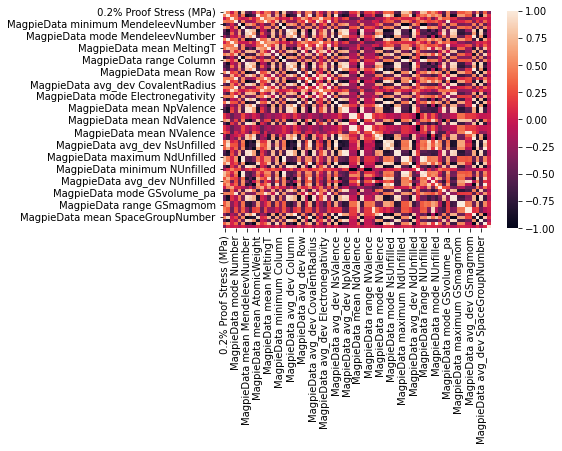

In [62]:
sns.heatmap(df_magpie.corr())

In [63]:
X = df_magpie[df_magpie.columns[1:]]
Y = df_magpie[' 0.2% Proof Stress (MPa)']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, shuffle=True, test_size=0.1, random_state=42)

In [64]:
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [65]:
model_cv_first = CV()

In [66]:
model_cv_first['test_neg_mean_absolute_error']

array([-12.37027983, -17.78647049, -12.71692494, -13.41065985,
       -11.82249319])

In [67]:
# средняя ошибка
np.mean(model_cv_first['test_neg_mean_absolute_error'])

-13.621365658053827

In [68]:
num_first = np.argmin(np.abs(model_cv_first['test_neg_mean_absolute_error'])) #отберём данные с минимальой абсолютной погрешностью

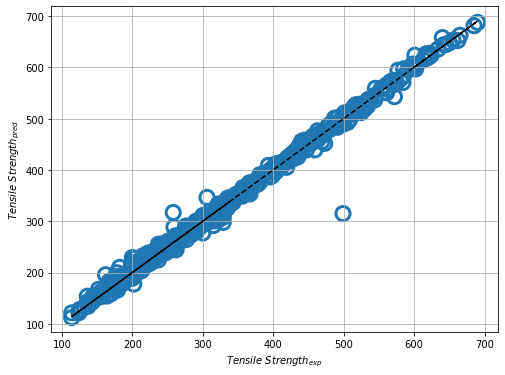

RMSE = 11.358754562651573 


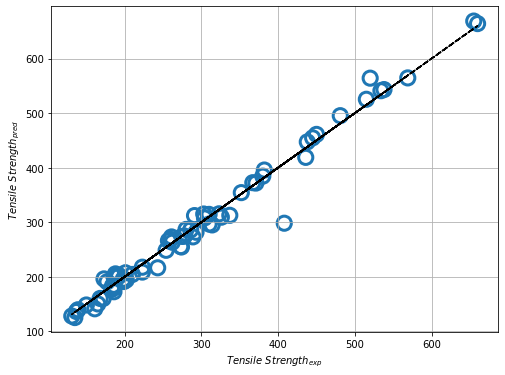

RMSE = 18.232480854348875 


In [69]:
ypred_train = model_cv_first['estimator'][num_first].predict(X_train)
ypred_test = model_cv_first['estimator'][num_first].predict(X_test)

plot_diff(y_train, ypred_train)
plot_diff(y_test, ypred_test)

In [70]:
DATA = pd.DataFrame({'feature_importance': model_cv_first['estimator'][num_first].get_feature_importance(), 
              'feature_names': X.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)
DATA

,feature_importance,feature_names
70,37.476630,Temperature (°C)
53,7.523233,MagpieData range NUnfilled
15,6.494087,MagpieData range Column
3,3.555699,MagpieData minimum MendeleevNumber
31,2.848980,MagpieData mean NpValence
19,2.588189,MagpieData mean Row
4,2.326886,MagpieData range MendeleevNumber
22,2.258031,MagpieData mean CovalentRadius
68,1.953339,MagpieData avg_dev SpaceGroupNumber
45,1.878094,MagpieData mean NpUnfilled


In [110]:
data_bad = DATA[DATA.feature_importance < 0.5]
data_bad

,feature_importance,feature_names
29,0.485647,MagpieData avg_dev NsValence
43,0.471250,MagpieData avg_dev NsUnfilled
25,0.389105,MagpieData mean Electronegativity
12,0.377383,MagpieData avg_dev MeltingT
61,0.374964,MagpieData avg_dev GSbandgap
23,0.365403,MagpieData avg_dev CovalentRadius
11,0.328495,MagpieData mean MeltingT
2,0.328445,MagpieData mode Number
36,0.301115,MagpieData avg_dev NdValence
69,0.257892,MagpieData mode SpaceGroupNumber


In [111]:
names = data_bad.drop(['feature_importance'], axis=1)
names = np.array(names)
print(names)

[['MagpieData avg_dev NsValence']
 ['MagpieData avg_dev NsUnfilled']
 ['MagpieData mean Electronegativity']
 ['MagpieData avg_dev MeltingT']
 ['MagpieData avg_dev GSbandgap']
 ['MagpieData avg_dev CovalentRadius']
 ['MagpieData mean MeltingT']
 ['MagpieData mode Number']
 ['MagpieData avg_dev NdValence']
 ['MagpieData mode SpaceGroupNumber']
 ['MagpieData avg_dev AtomicWeight']
 ['MagpieData avg_dev Number']
 ['MagpieData mode MeltingT']
 ['MagpieData avg_dev GSvolume_pa']
 ['MagpieData mode GSmagmom']
 ['MagpieData mode Electronegativity']
 ['MagpieData mode NsValence']
 ['MagpieData mode Column']
 ['MagpieData mode GSvolume_pa']
 ['MagpieData range GSmagmom']
 ['MagpieData maximum NValence']
 ['MagpieData maximum GSmagmom']
 ['MagpieData maximum NdValence']
 ['MagpieData mode NUnfilled']
 ['MagpieData mode CovalentRadius']
 ['MagpieData minimum NUnfilled']
 ['MagpieData range NdValence']
 ['MagpieData mode NValence']
 ['MagpieData range NValence']
 ['MagpieData mode Row']
 ['MagpieDa

In [112]:
df_new = df_magpie.copy()

In [113]:
for i in names:
    df_new.drop(i, axis=1, inplace=True)
    
df_new.head()

,0.2% Proof Stress (MPa),MagpieData mean Number,MagpieData minimum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData mean AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mean CovalentRadius,MagpieData avg_dev Electronegativity,MagpieData mean NsValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mean NdValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mean NsUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mean GSvolume_pa,MagpieData mean GSbandgap,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,Temperature (°C)
0,342,26.214092,49.0,39.0,55.720428,8.747454,49.0,57.645047,51.9961,6.0,10.0,7.870431,2.496086,3.993335,0.45767,134.972387,0.237972,1.406724,0.374203,0.610928,4.252545,6.033472,0.772194,0.593276,0.727972,1.188493,5.0,5.0,3.910496,1.675792,6.0,5.0,5.231744,0.889068,13.075013,0.322828,0.019465,0.037543,223.712151,7.110835,27
1,338,26.214092,49.0,39.0,55.720428,8.747454,49.0,57.645047,51.9961,6.0,10.0,7.870431,2.496086,3.993335,0.45767,134.972387,0.237972,1.406724,0.374203,0.610928,4.252545,6.033472,0.772194,0.593276,0.727972,1.188493,5.0,5.0,3.910496,1.675792,6.0,5.0,5.231744,0.889068,13.075013,0.322828,0.019465,0.037543,223.712151,7.110835,100
2,337,26.214092,49.0,39.0,55.720428,8.747454,49.0,57.645047,51.9961,6.0,10.0,7.870431,2.496086,3.993335,0.45767,134.972387,0.237972,1.406724,0.374203,0.610928,4.252545,6.033472,0.772194,0.593276,0.727972,1.188493,5.0,5.0,3.910496,1.675792,6.0,5.0,5.231744,0.889068,13.075013,0.322828,0.019465,0.037543,223.712151,7.110835,200
3,346,26.214092,49.0,39.0,55.720428,8.747454,49.0,57.645047,51.9961,6.0,10.0,7.870431,2.496086,3.993335,0.45767,134.972387,0.237972,1.406724,0.374203,0.610928,4.252545,6.033472,0.772194,0.593276,0.727972,1.188493,5.0,5.0,3.910496,1.675792,6.0,5.0,5.231744,0.889068,13.075013,0.322828,0.019465,0.037543,223.712151,7.110835,300
4,316,26.214092,49.0,39.0,55.720428,8.747454,49.0,57.645047,51.9961,6.0,10.0,7.870431,2.496086,3.993335,0.45767,134.972387,0.237972,1.406724,0.374203,0.610928,4.252545,6.033472,0.772194,0.593276,0.727972,1.188493,5.0,5.0,3.910496,1.675792,6.0,5.0,5.231744,0.889068,13.075013,0.322828,0.019465,0.037543,223.712151,7.110835,400


In [114]:
df_new.shape

(683, 41)

<AxesSubplot:>

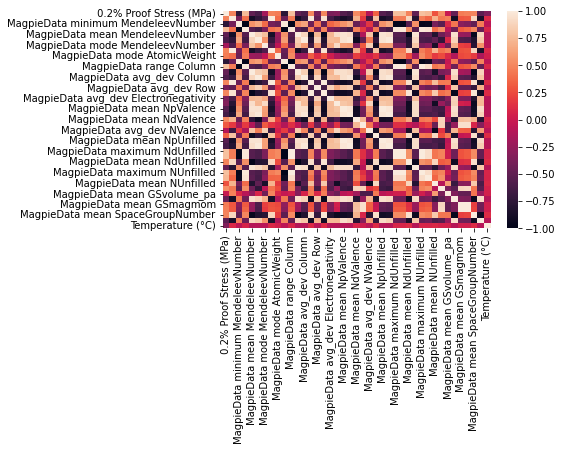

In [115]:
sns.heatmap(df_new.corr())

In [116]:
X = df_new[df_new.columns[1:]]
Y = df_new[' 0.2% Proof Stress (MPa)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

In [117]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
model_CV_second = CV()

In [119]:
model_CV_second['test_neg_mean_absolute_error']
# средняя ошибка
np.mean(model_CV_second['test_neg_mean_absolute_error'])

-12.694462127887885

In [120]:
num_imp = np.argmin(np.abs(model_CV_second['test_neg_mean_absolute_error'])) #отберём данные с минимальой абсолютной погрешностью

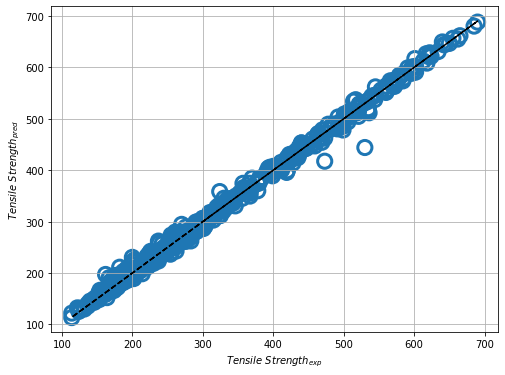

RMSE = 8.705097623650422 


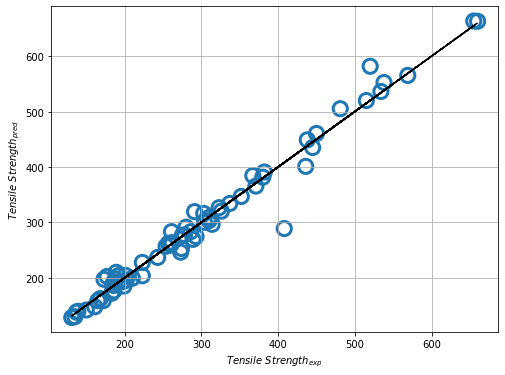

RMSE = 20.306306183211458 


In [121]:
ypred_train = model_CV_second['estimator'][num_imp].predict(X_train)
ypred_test = model_CV_second['estimator'][num_imp].predict(X_test)

plot_diff(y_train, ypred_train)
plot_diff(y_test, ypred_test)


In [128]:
rbf_mse = pd.DataFrame(columns=['gamma', 'C', 'mse'])

for gamma in np.linspace(12e-2, 13e-2, 5):
    for C in np.linspace(7700, 7900, 5):
        rbf = SVR(kernel='rbf', C=C, gamma=gamma)
        rbf.fit(X_train,y_train)
        new_row = pd.Series({'gamma': gamma, 'C': C, 
                             'mse': mse(y_test, rbf.predict(X_test), squared=False)})
        rbf_mse = pd.concat([rbf_mse, new_row.to_frame().T], ignore_index=True)
            
rbf_mse = rbf_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
rbf_mse

,gamma,C,mse
0,0.12,7800.0,23.124177
1,0.12,7750.0,23.124263
2,0.12,7700.0,23.124422
3,0.12,7850.0,23.12462
4,0.12,7900.0,23.125277
5,0.1225,7700.0,23.140794
6,0.1225,7750.0,23.144818
7,0.1225,7800.0,23.148665
8,0.1225,7850.0,23.152719
9,0.1225,7900.0,23.157938


## Best Model:

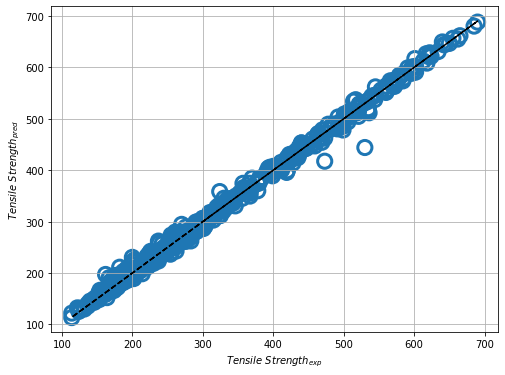

RMSE = 8.705097623650422 


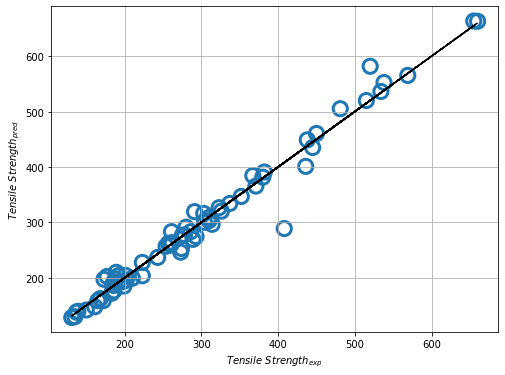

RMSE = 20.306306183211458 


In [129]:
ypred_train = model_CV_second['estimator'][num_imp].predict(X_train)
ypred_test = model_CV_second['estimator'][num_imp].predict(X_test)

plot_diff(y_train, ypred_train)
plot_diff(y_test, ypred_test)